# General information
 * Author: Joris Busink, Junior Teacher Physics Education.
 * Date: Sat, 5th Nov.
 * About: Data processing script for high-speed camera. 

 For questions and suggestions please email:<br>
 J.Busink@vu.nl.<br>
 [Github](https://github.com/JBusink/Nummerical-Differentiation)

## Load packages <a id='Loadpackages'></a>
I load the following packages: 
* [Numpy](https://numpy.org), numerical Python.<br> 
* [Matplotlib](https://matplotlib.org).pyplot, for creating static, animated, and interactive visualizations in Python.<br>
* [Pandas](https://pandas.pydata.org). A fast and efficient library to handle DataFrame objects.<br>

We need these packages to analyze, plot and fit our data. These packages are in<br>
genereal very useful in doing numerical calculations with Python. Furthermore I imported os to set a<br>
working directory.

In [35]:
# %matplotlib widget #requires package ipympl installed, for interactive plots.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

np.set_printoptions(precision=4,threshold =9,suppress=True)  #Compact display of arrays.

cwd = os.getcwd() #get current working directory.
cwd= os.path.split(os.getcwd())[0] 

# Data Kick
In the other script (Canvas), our starting point was a (pendulum) model. However, in most (bio)mechanical experiments, there's not an <br>analytical model that describes the time-evolution of the system. In the next sections I will (quickly) go over the data of a kick.<br> The data was, just as before, captures with a high-speed camera. Please visit the Canvas page for a more detailed explanation of <br> the techniques used throughout this script.

In [36]:
df=pd.read_csv(cwd+'/data/schop.csv', sep='\t',header=0)
Time = df['Time'].str.replace(',', '.').astype(float).to_list()
Angle = df['Angle #1'].str.replace(',', '.').astype(float).to_list()
Angle =np.asarray(Angle)*np.pi/180

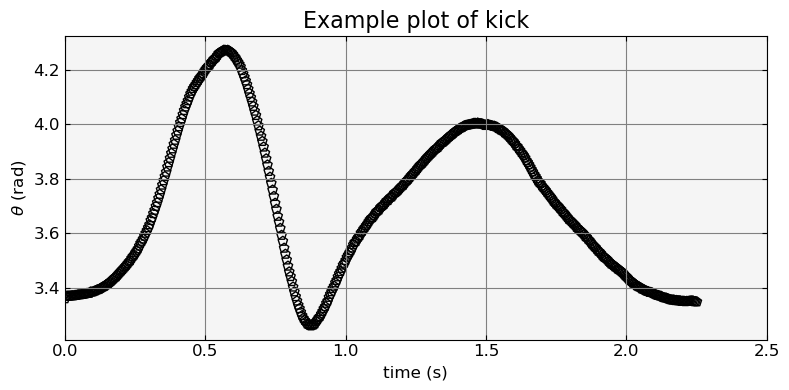

In [37]:
fig,axes=plt.subplots(1,1,figsize=(8,4))
axes.set_title('Example plot of kick',fontsize=16)
axes.scatter(Time,Angle ,color = 'black', s = 50, marker ='p',ec='black',fc='none') #plot every tenth datapoint [::10]
axes.set_xlabel('time (s)',fontsize=12)
axes.set_ylabel(r'$\theta$ (rad)',fontsize=12)
axes.set_xlim(0,2.5)
axes.tick_params(direction="in",labelsize=12,bottom = True,top = True,left= True,right=True) #inward direction of tick-lines
axes.set_facecolor('whitesmoke')
axes.grid(True,color='gray')
plt.tight_layout() #creates optimal padding levels for figure (especially usefull for side-by-side figures)
plt.show()

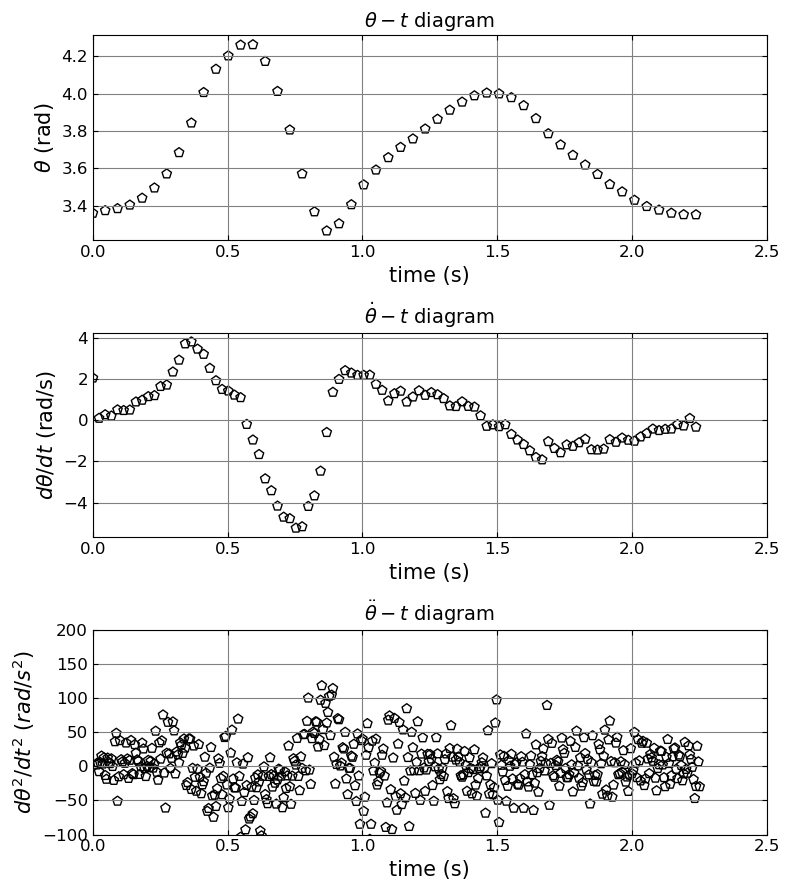

In [38]:
der1 = np.gradient(Angle,Time)
der2 = np.gradient(der1,Time)

fig,axes=plt.subplots(3,1,figsize=(8,9))
axes[0].scatter(Time[::10],Angle[::10],color = 'black', s = 50, marker ='p',ec='black',fc='none') #plot every tenth datapoint [::10]
axes[1].scatter(Time[::5], der1[::5], color='black', s = 50, marker ='p',ec='black',fc='none')
axes[2].scatter(Time[::], der2[::], color='black', s = 50, marker ='p',ec='black',fc='none')


axes[0].set_title(r'$\theta-t$ diagram',fontsize=14)
axes[1].set_title(r'$\dot{\theta}-t$ diagram',fontsize=14)
axes[2].set_title(r'$\ddot{\theta}-t$ diagram',fontsize=14)
axes[2].set_ylim(-100,200)
for i in range(3):
    axes[i].set_xlim(0,2.5)
    axes[i].set_xlabel('time (s)',fontsize=15)
    axes[i].tick_params(direction="in",labelsize=12,bottom = True,top = True,left= True,right=True) #inward direction of tick-lines
    axes[i].grid(True,color='gray')

axes[0].set_ylabel(r'$\theta$ (rad)',fontsize=15)
axes[1].set_ylabel(r'$d\theta/dt$ (rad/s)',fontsize=15)
axes[2].set_ylabel(r'$d\theta^2/dt^2$ $(rad/s^2)$',fontsize=15)
plt.tight_layout()
plt.show()

# location='user_defined_location'
# plt.savefig('location'+'simple_pendulum.svg')

## Filtered data Kick

Just as before, we apply a filter to the data. However, we cannot use the same filtering window $w$. <br> During an analysis, the filtering window has to be checked manually!<br> 
The optimal window width is, as always, a trade-off between the resolution of the data and the details of the analysis.<br>
To make this analysis a little less subjective, one can lay the filtered data on top of the original data. 

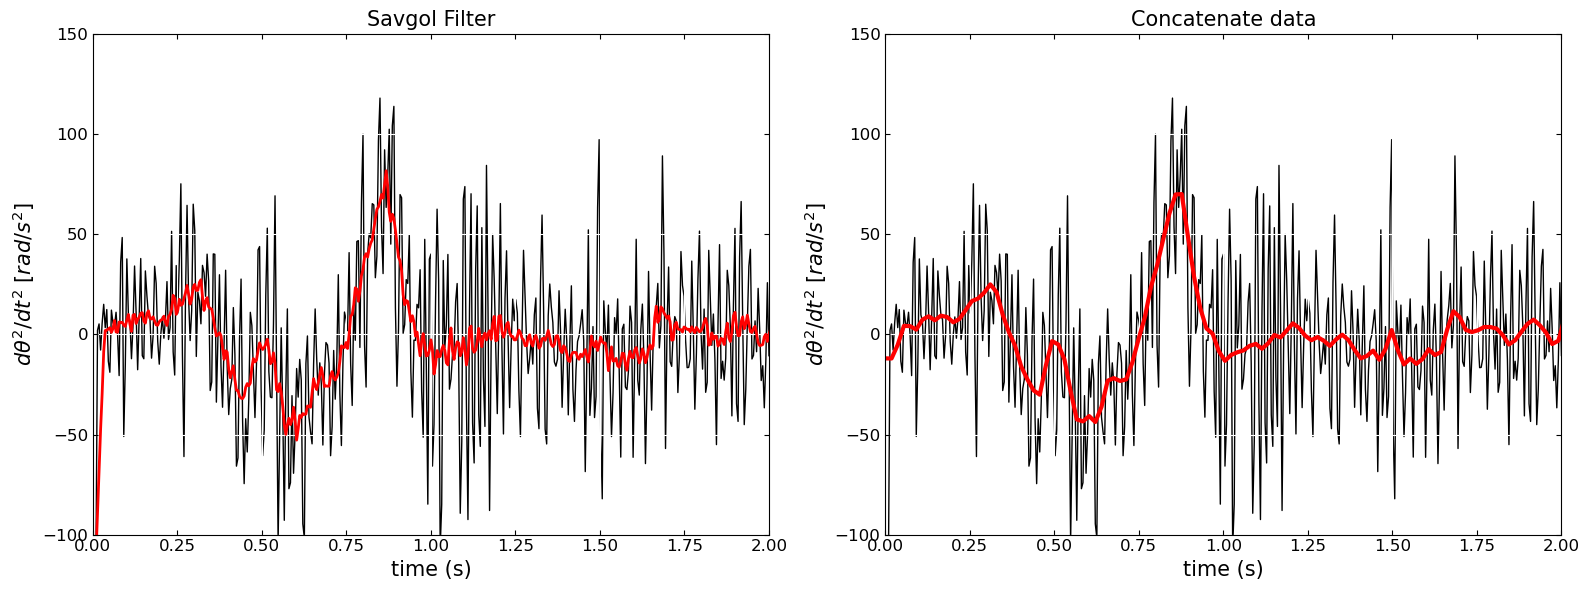

In [39]:
from scipy.signal import savgol_filter

x_opt = Angle[::4]
t_opt = Time[::4]
der_slice1 = np.gradient(x_opt,t_opt)
der_slice2 = np.gradient(der_slice1,t_opt)

fig,axes=plt.subplots(1,2,figsize=(16,6))
axes[0].plot(Time, der2,color = 'black',lw=1,zorder=1)
axes[0].plot(Time, savgol_filter(der2,11,1),color = 'red',lw=2,zorder=2)
axes[0].set_title('Savgol Filter',fontsize=15)

axes[1].plot(t_opt,der_slice2,color ='red',lw=3,zorder=2)
axes[1].plot(Time, der2,color = 'black',lw=1,zorder=1)
axes[1].set_title('Concatenate data',fontsize=15)

for i in range(2):
    axes[i].set_ylim(-100,150)
    axes[i].set_xlim(0,2)
    axes[i].set_xlabel('time (s)',fontsize=15)
    axes[i].tick_params(direction="in",labelsize=12,bottom = True,top = True,left= True,right=True) 
    axes[i].set_ylabel(r'$d\theta^2/dt^2$ $[rad/s^2]$',fontsize=15)
    axes[i].grid(True,color='white')


plt.tight_layout()
plt.show()

# Optimal Filtering
In the previous two figures we observe the same trend, by increasing the filtering strength the noisy data becomes more smooth.<br>
We could ask ourself the question: "What is the optimal amout of filtering?". This is a perfectly valid question,<br>
however, it is a really! hard question to answer. This depends on the
system that you're investigating and the question that you want to answer.<br>

In the example of the kick, we are interested in the maximum (angular) acceleration $(d\theta^2/dt^2)$.<br>
By increasing the strenght of the filtering we remove excessive noise. However, if we are not careful, we remove the signal.<br> 
This implies that there's a cross-over regime: a noise dominated area (Area I, in green) and a signal dominated area (Area II, in red), see figure below.

In regime I the filter removes mainly the noise from on top of the signal, the maximum acceleration is strongly affected by the filtering width (green-dashed line).<br>
After the noise is filtered, the maximum acceleration decreases slowly (regime II), this is the removal of the signal (red-dashed line).

![Maximum filtering window](https://raw.githubusercontent.com/JBusink/Nummerical-Differentiation/main/Figures/Maximum_filter.png)


In [34]:
windowlist = []
maxlist = []
for i in range(1,30,1):
    x_opt = Angle[::i]
    t_opt = Time[::i]
    der_slice1 = np.gradient(x_opt,t_opt)
    der_slice2 = np.gradient(der_slice1,t_opt)
    windowlist.append(i)
    maxlist.append(np.max(der_slice2))
      
fig,axes=plt.subplots(1,1,figsize=(8,4),sharex=True,sharey=True)
axes.scatter(windowlist,maxlist,color='black',s=25,fc='none',ec='black') 
axes.plot(np.arange(0,15),140-25*np.arange(0,15),color='red',ls='--')
axes.plot(np.arange(0,30),72-2*np.arange(0,30),color='blue',ls='--')

axes.set_xlabel('Filtering width',fontsize=16)
axes.set_ylabel(r'$Max(\frac{d\theta^2}{dt^2})$',fontsize=16)
axes.set_xlim(0,20)
axes.set_ylim(0,140)

axes.tick_params(direction="in",labelsize=12,bottom = True,top = True,left= True,right=True)
plt.tight_layout()
# plt.show()
plt.close()
